In [70]:
import sys
sys.path.append("..")

import os
import glob
import numpy as np

%load_ext autoreload
%autoreload 2

from sicm import io, plots, model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
parent = "S:/UsersData/Martin/projects/thermometry/comsol/I_vs_d/3/"
files = glob.glob(parent + "*.txt")
print(files)

['S:/UsersData/Martin/projects/thermometry/comsol/I_vs_d/3\\ecJz.txt', 'S:/UsersData/Martin/projects/thermometry/comsol/I_vs_d/3\\ecJ3D.txt']


Saved figure to I_vs_d_curve.pdf.


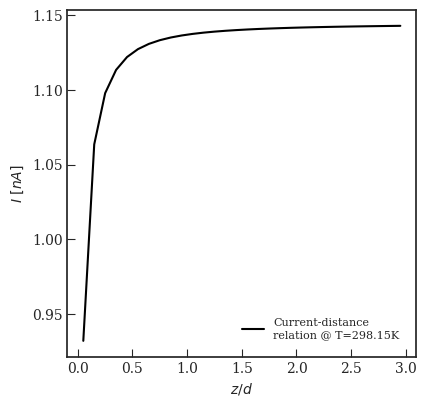

In [115]:
# Current-distance simulation
data = io.load_comsol(files[0])
r_i = 15e-9
x = data.iloc[:, 0] / (r_i*2) # scale by diameter
y = np.abs(data.iloc[:, 1])*1e9 # convert to nanoAmps
leg = "Current-distance relation @ T=298.15K"
plots.plot_generic(x, y, r"$z/d$", r"$I\ [nA]$", leg, "I vs. d curve")

['S:/UsersData/Martin/projects/thermometry/comsol/I_vs_Tsub/3\\ecJz.txt', 'S:/UsersData/Martin/projects/thermometry/comsol/I_vs_Tsub/3\\ecJ3D.txt']
Saved figure to I_vs_Tsub_curve.pdf.


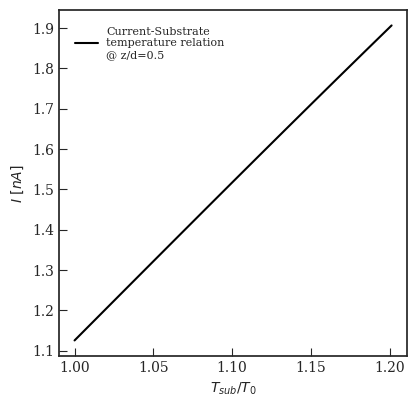

In [96]:
# Current-Tsub simulation
parent = "S:/UsersData/Martin/projects/thermometry/comsol/I_vs_Tsub/3/"
files = glob.glob(parent + "*.txt")
print(files)

data = io.load_comsol(files[0])
x = data.iloc[:, 0] / (data.iloc[0, 0]) # scale by room temperature
y = np.abs(data.iloc[:, 2])*1e9 # convert to nanoAmps
leg = "Current-Substrate temperature relation @ z/d=0.5"
plots.plot_generic(x, y, r"$T_{sub}/T_{0}$", r"$I\ [nA]$", leg, "I vs. Tsub curve")

Saved figure to I_vs_z_curve.pdf.


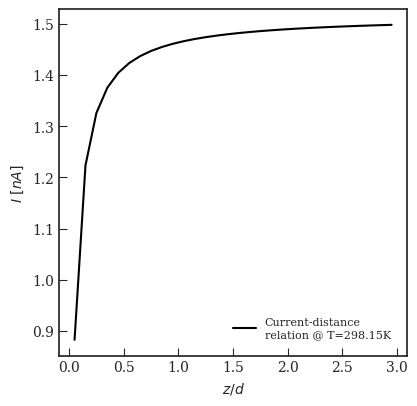

In [119]:
# Analytical Model
r_i = 15e-9
U = 0.1
kappa = 3.7 # 1/(Ohm*m), read from plot for T = 298.15K, can calculate later
h = 23e-6
r_p = 2e-6
r_o = 26e-9
z = np.arange(r_i/10, 6*r_i, r_i/5)

sicm_model = model.SICMModel(z, U, h, kappa, r_p, r_i, r_o)
sicm_model.plot()

In [138]:
# obtain a model that yields distance for some measured current
r_i = 15e-9
U = 0.1
kappa = 3.7 # 1/(Ohm*m), read from plot for T = 298.15K, can calculate later
h = 23e-6
r_p = 2e-6
r_o = 26e-9
z = np.arange(r_i/10, 6*r_i, r_i/5)

# continue here by fitting inverse relationship
sicm_model = model.SICMModel(z, U, h, kappa, r_p, r_i, r_o)
fun, guess = sicm_model.fit_wrapper()

In [136]:
fun(1.2e-9, r_p, h, kappa)/(2*r_i)

0.13615610379399837